# 공간 중첩/ 연산 

https://datascienceschool.net/03%20machine%20learning/03.04.01%20%EC%A7%80%EB%A6%AC%20%EC%A0%95%EB%B3%B4%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%B2%98%EB%A6%AC.html   

https://shapely.readthedocs.io/en/stable/manual.html  

In [10]:
import geopandas as gpd
gpd.__version__

'0.9.0'

In [11]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

countries.tail(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
176,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."


In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
mpl.rc('font', family='NanumGothic') #한글 폰트 적용시
plt.rcParams["figure.figsize"] = (12, 8) #차트 사이즈

C:\Users\c167512\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\c167512\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


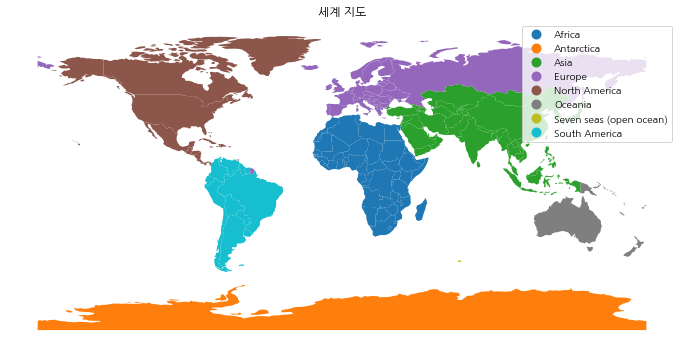

In [13]:
ax = countries.plot(column="continent", legend=True, categorical=True)
ax.set_title("세계 지도")
ax.set_axis_off()
plt.show()

C:\Users\c167512\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\c167512\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


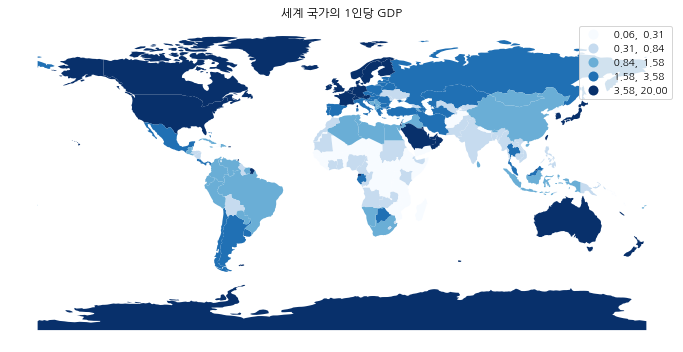

In [14]:
# 1인당 GDP 연산
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(column='gdp_per_cap', legend=True, scheme='quantiles', cmap="Blues", k=5)
ax.set_axis_off()
ax.set_title("세계 국가의 1인당 GDP")
plt.show()

## Geometry 데이터

### Polygons

In [15]:
countries.geom_type[:3]

0    MultiPolygon
1         Polygon
2         Polygon
dtype: object

In [16]:
# 여러 개의 점(Point)들로 이루어져있다.
print(countries.geometry[113])

POLYGON ((23.48412763844985 53.91249766704114, 23.527535841575 53.47012156840655, 23.80493493011778 53.08973135030607, 23.79919884613338 52.69109935160657, 23.19949384938619 52.48697744405367, 23.50800215016869 52.02364655212473, 23.52707075368437 51.57845408793031, 24.0299857927489 50.70540660257518, 23.92275719574326 50.42488108987874, 23.42650841644439 50.30850576435745, 22.5184501482116 49.47677358661974, 22.77641889821263 49.02739533140962, 22.55813764821175 49.08573802346714, 21.60780805836421 49.47010732685409, 20.88795535653841 49.32877228453583, 20.41583947111985 49.43145335549977, 19.82502282072687 49.21712535256923, 19.32071251799047 49.57157400165919, 18.90957482267632 49.43584585224458, 18.85314415861362 49.49622976337764, 18.39291385262217 49.98862864847075, 17.64944502123899 50.04903839781996, 17.55456709155112 50.36214590107642, 16.86876915860566 50.47397370055603, 16.71947594571444 50.21574656839354, 16.17625328946227 50.42260732685791, 16.23862674323857 50.69773265237

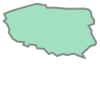

In [17]:
countries.geometry[113]

### Points

In [18]:
cities.geom_type[:3]

0    Point
1    Point
2    Point
dtype: object

C:\Users\c167512\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\c167512\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\c167512\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


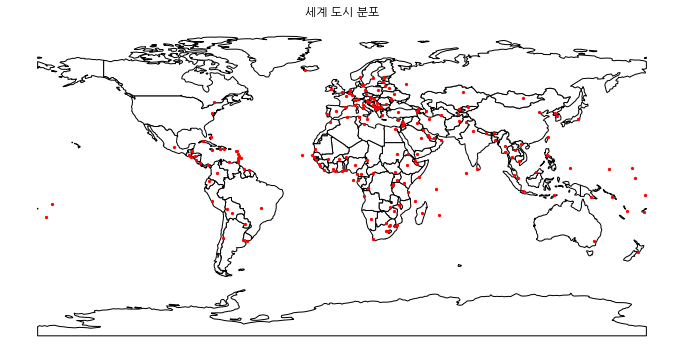

In [19]:
base = countries.plot(color='white', edgecolor="k")
ax = cities.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_axis_off()
ax.set_title("세계 도시 분포")
plt.show()

### LineString

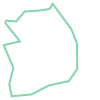

In [20]:
korea_border = countries[countries.name == "South Korea"].geometry
# 버전 0.6 이상에서는 "South Korea"를 사용해야 함

#squeeze 함수는 geometry만을 추출하는 기능을 함 
korea_border.boundary.squeeze()

<AxesSubplot:>

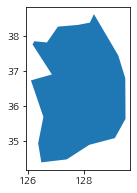

In [21]:
korea_border.plot(figsize=(5,3))

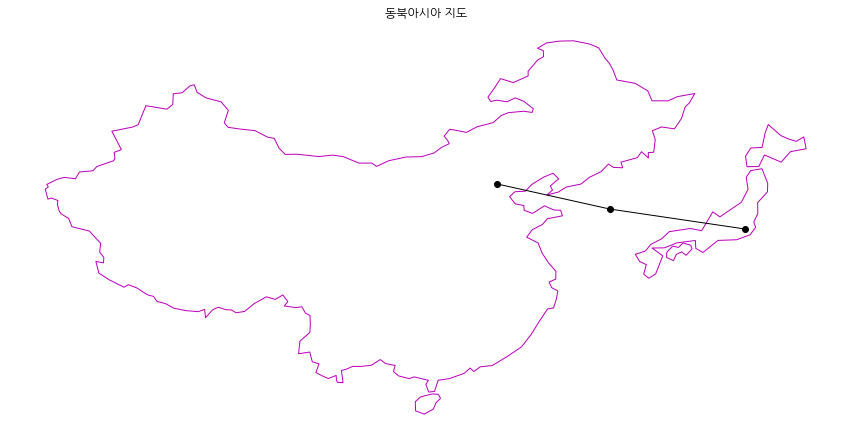

In [22]:
from shapely.geometry import Point, Polygon, LineString

northern_asia = countries.loc[countries['name'].isin(['Korea', 'China', 'Japan'])]
base = northern_asia.plot(figsize=(15, 15), color="w", edgecolor="m")

seoul = cities.loc[cities.name == "Seoul", "geometry"].squeeze()
beijing = cities.loc[cities.name == "Beijing", "geometry"].squeeze()
tokyo = cities.loc[cities.name == "Tokyo", "geometry"].squeeze()

line = LineString([beijing, seoul, tokyo])

ax = gpd.GeoSeries([seoul, beijing, tokyo, line]).plot(ax=base, color="k", edgecolor='k', lw=1)
ax.set_title("동북아시아 지도")
ax.set_axis_off()
plt.show()

within : 지리적으로 포함되는지 여부

contains : 지리적으로 포함하고 있는지 여부

intersects : 지리적으로 교차하는지 여부, 두 지리가 경계선만 닿아있어도, True를 반환

crosses : 지리적으로 교차하는지 여부, intersects와 차이점은 crosses는 내부를 지나가야만 True를 반환한다는 것이다.

In [23]:
korea = countries.loc[countries['name'] == 'South Korea', 'geometry'].squeeze()
china = countries.loc[countries['name'] == 'China', 'geometry'].squeeze()
japan = countries.loc[countries['name'] == 'Japan', 'geometry'].squeeze()

In [24]:
seoul.within(korea)

True

In [25]:
korea.contains(seoul)

True

In [26]:
china.intersects(korea)

False

In [27]:
line.crosses(korea)

True

In [28]:
countries[countries.crosses(line)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
95,25248140,Asia,North Korea,PRK,40000.0,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...",0.158428
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",3.768955
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.532658
155,126451398,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",3.900313


## 속성을 이용한 연산

In [29]:
seoul.distance(beijing)

10.871264032732043

In [30]:
countries[ countries.geometry.distance(seoul) <= seoul.distance(beijing)] 

<ipython-input-30-78dfd35d2a1b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries[ countries.geometry.distance(seoul) <= seoul.distance(beijing)]


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...",2.632550
95,25248140,Asia,North Korea,PRK,40000.0,"MULTIPOLYGON (((130.780 42.220, 130.780 42.220...",0.158428
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.175 37.750, 126.237 37.840, 126....",3.768955
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.475 18.198, 108.655 18.508...",1.532658
155,126451398,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((141.885 39.181, 140.959 38.174...",3.900313


In [31]:
china.area / korea.area

95.89679828612043

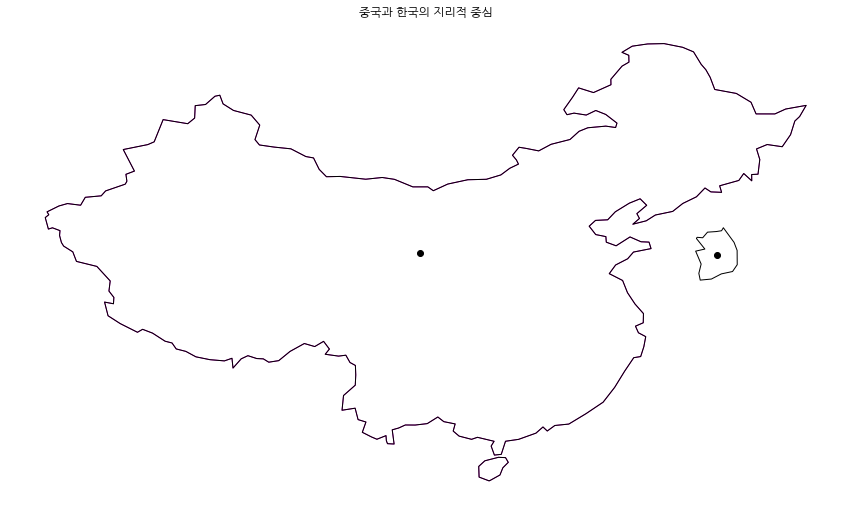

In [32]:
base = northern_asia[northern_asia.name != "Japan"].plot(
    figsize=(15, 15), color="w", edgecolor="m")
ax = gpd.GeoSeries([china.boundary, korea.boundary, china.centroid,
                    korea.centroid]).plot(ax=base, color="k", edgecolor='k', lw=1)
ax.set_title("중국과 한국의 지리적 중심")
ax.set_axis_off()
plt.show()

## 지리 정보 조작

In [33]:
seoul_file = "./data/TL_KODIS_BAS_11.shp"
seoul = gpd.read_file(seoul_file, encoding='euckr')
seoul.tail(3)

,BAS_MGT_SN,CTP_KOR_NM,SIG_CD,SIG_KOR_NM,BAS_ID,BAS_AR,NTFC_DE,MVMN_DE,MVMN_RESN,OPERT_DE,geometry
5662,1129000046,서울특별시,11290,성북구,02851,0.052,20121221,20121221,국가기초구역 최초생성,20121221000000,"POLYGON ((957702.910 1954159.861, 957702.912 1..."
5663,1129000047,서울특별시,11290,성북구,02822,1.087,20121221,20121221,국가기초구역 최초생성,20121221000000,"POLYGON ((954675.916 1956603.960, 954675.984 1..."
5664,1129000068,서울특별시,11290,성북구,02838,0.126,20121221,20121221,국가기초구역 최초생성,20121221000000,"POLYGON ((955414.324 1955463.203, 955410.167 1..."


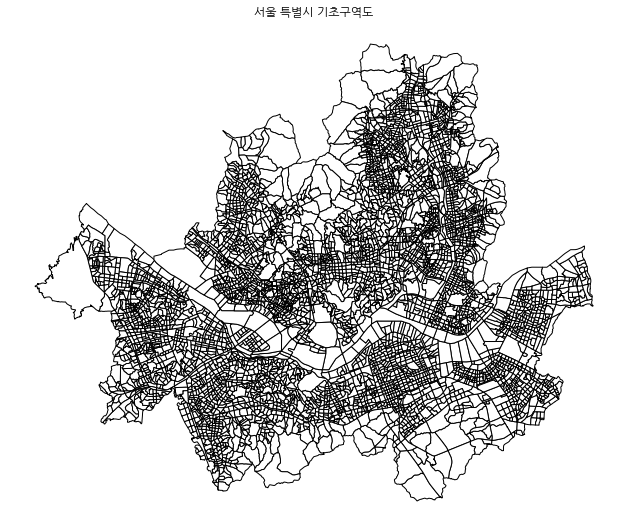

In [34]:
ax = seoul.plot(figsize=(11, 11), color="w", edgecolor="k")
ax.set_title("서울 특별시 기초구역도")
ax.set_axis_off()
plt.show()

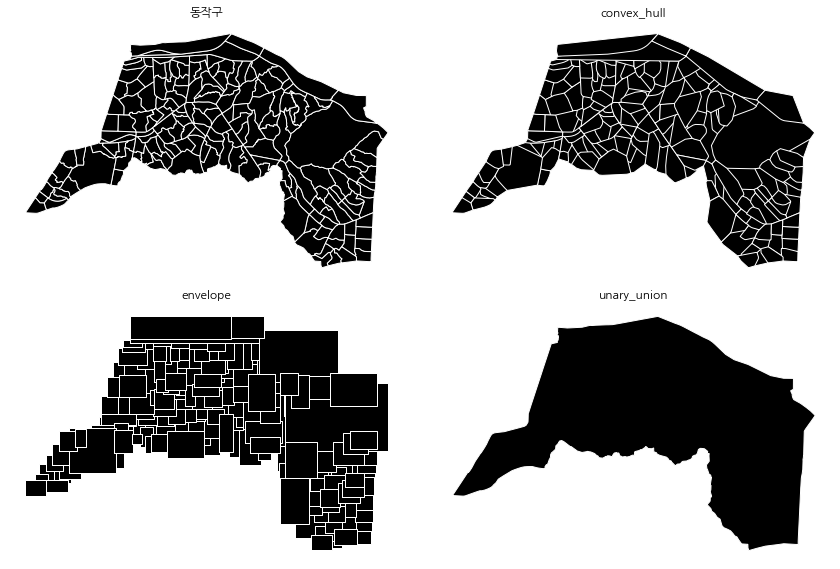

In [35]:
sample = seoul[seoul.SIG_KOR_NM == "동작구"]

ax = plt.subplot(2, 2, 1)
sample.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("동작구")
ax.set_axis_off()

ax = plt.subplot(2, 2, 2)
sample.convex_hull.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("convex_hull")
ax.set_axis_off()

ax = plt.subplot(2, 2, 3)
sample.envelope.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("envelope")
ax.set_axis_off()

ax = plt.subplot(2, 2, 4)
gpd.GeoSeries([sample.geometry.buffer(0.1).unary_union]
              ).plot(ax=ax, color="k", edgecolor='w')
ax.set_title("unary_union")
ax.set_axis_off()

plt.tight_layout()
plt.show()


## Dissolve

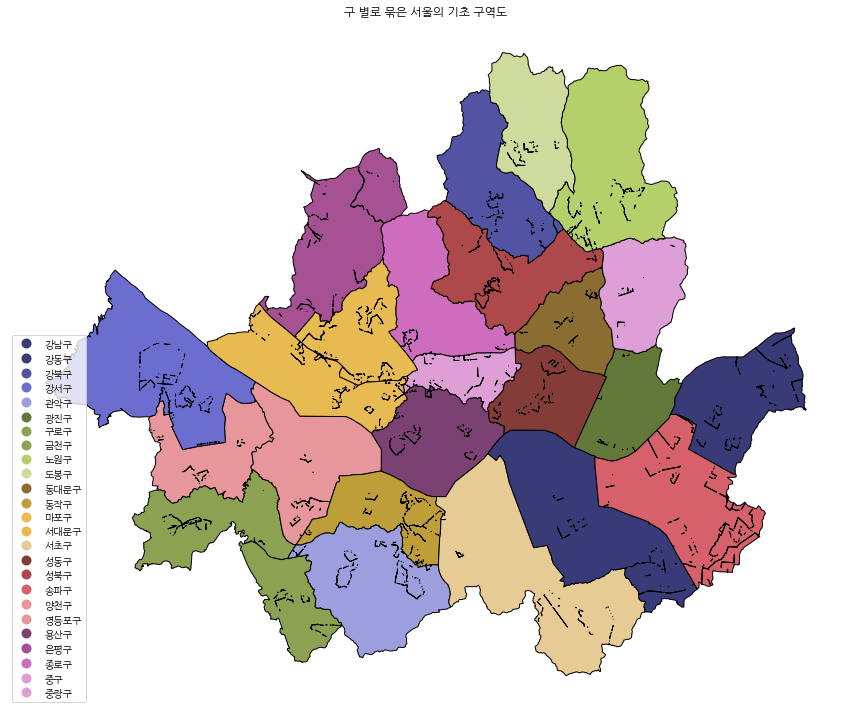

In [36]:
#seoul.geometry = seoul.buffer(0.01)   #주석 해제 후와 비교 및 buffer 단위를 1로 바꾼 후의 결과를 비교 
seoul = seoul.dissolve(by='SIG_CD')
ax = seoul.plot(figsize=(15, 15), column="SIG_KOR_NM", categorical=True,
                cmap="tab20b", edgecolor="k", legend=True, legend_kwds={'loc': 3})
ax.set_title("구 별로 묶은 서울의 기초 구역도")
ax.set_axis_off()
plt.show()

# 수고 많으셨습니다!